#### Tourism recommendation problem solving task **Unservised ML

rquired lib's

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans, DBSCAN, kmeans_plusplus
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import unique, where
import seaborn as sborn 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from turtle import color
from operator import index

Q1C). Find out the optimal number of traveler groups, report the outcome and justify your findings

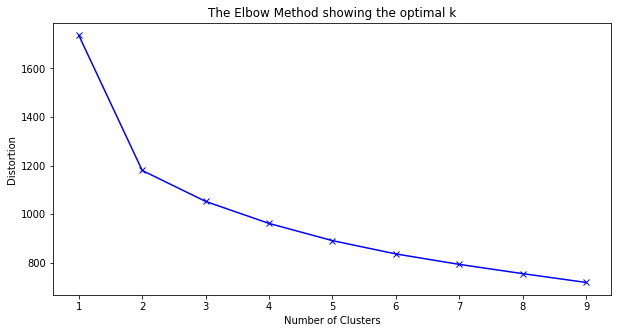

980


In [5]:
#finding the optimal parameter 

Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
# Trip_RecSys_data.info()
# Trip_RecSys_data.shape
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)
# print(Trip_RecSys_data_.head)
distortions = []
KVal = range(1,10)

for k in KVal:
    #kmeanModel = kmeans_plusplus(Trip_RecSys_data_, n_clusters=k)
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Trip_RecSys_data_)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(KVal, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(len(Trip_RecSys_data_))


K-Means usage for ML Clustering

980
10


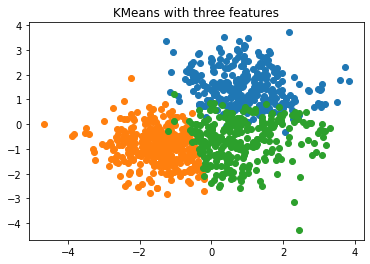

In [19]:
#KMeans classification

records = len(Trip_RecSys_data_)
features = len(Trip_RecSys_data_.columns)
elbow_value = 3

print(records)
print(features)
#define the dataset using Sklearn predefined make_classifiation() API
X, y = make_classification(n_samples=records, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=4)
#make the model
model = KMeans(n_clusters=elbow_value)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title("KMeans with three features")
pyplot.show()


#DBScan (Density-Based Spatial Clustering of Application with Noise) for ML classification 

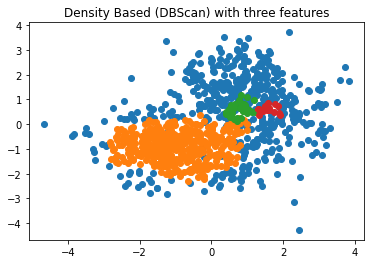

In [20]:
#DBScan (Density-Based Spatial Clustering of Application with Noise)
X, y = make_classification(n_samples=records, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.40, min_samples=15)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title("Density Based (DBScan) with three features")
pyplot.show()

2D Heatmap for correlation of feature

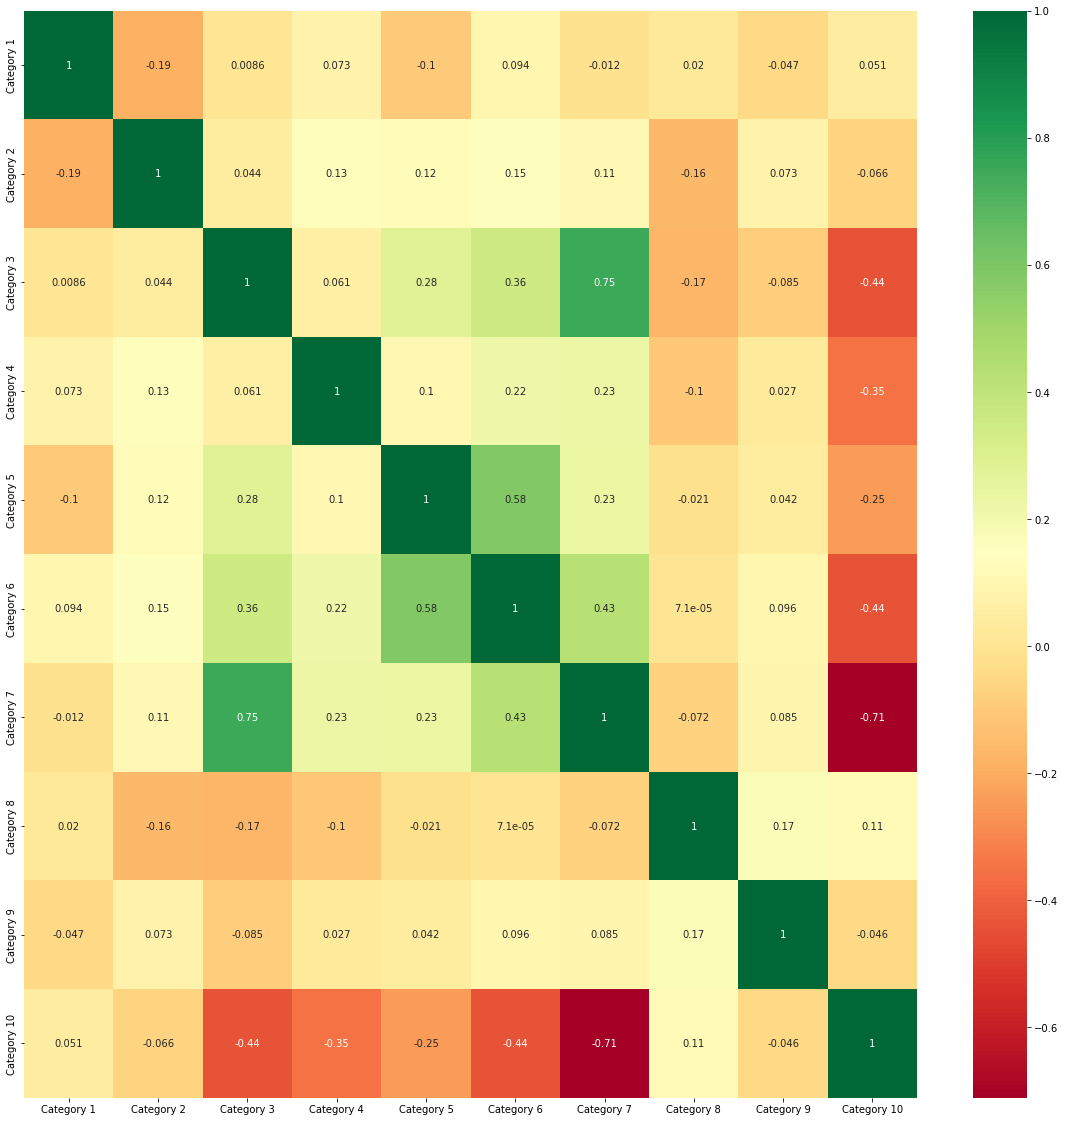

In [54]:
# importing or loading the dataset
Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
tripcorr = Trip_RecSys_data_.corr()
top_corr_features = tripcorr.index
#plt.matshow(Trip_RecSys_data_.corr())
#plt.show()
plt.figure(figsize=(20,20))
g=sborn.heatmap(Trip_RecSys_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Normalized/PCA with feature selection 

c:\Users\isajwani\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


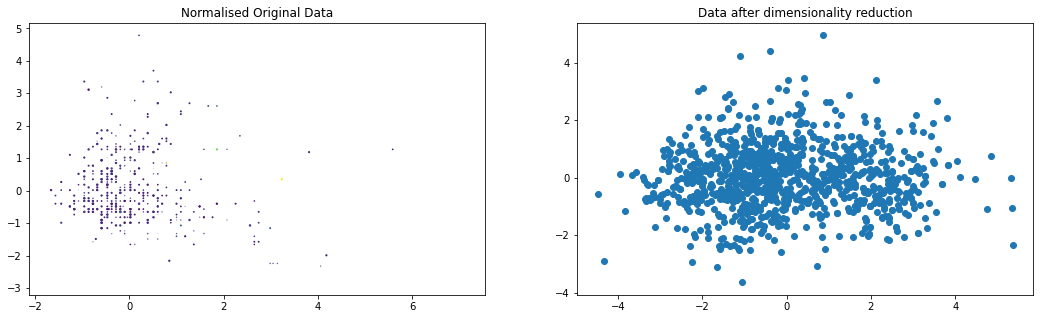

The reconstruction error is: 0.7589269810329782


In [105]:

Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)
Xnorm = scale(Trip_RecSys_data_)

#perform PCA using sklearn PCA implementation
pca_reduce = PCA(n_components=2)
# pca_reduce.fit(Xnorm)
pca_reduce_2var = pca_reduce.fit_transform(Xnorm)
pca_orgfeat = pca_reduce.inverse_transform(pca_reduce_2var)

# plot for Xnorm 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs
#axs[0].scatter(Xnorm[:,0], Xnorm[:,1], Xnorm[:,2], Xnorm[:,3], Xnorm[:,4],Xnorm[:,5],Xnorm[:,6],Xnorm[:,7],Xnorm[:,8])
axs[0].scatter(Xnorm[:,0], Xnorm[:,1], Xnorm[:,2], Xnorm[:,3])
axs[0].set_title("Normalised Original Data")

# plot for Xrec
axs[1].scatter(pca_reduce_2var[:,0], pca_reduce_2var[:,1])
axs[1].set_title("Data after dimensionality reduction")
plt.show()

rec_error = np.linalg.norm(Xnorm-pca_orgfeat, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(f'The reconstruction error is: {rec_error}')


Text(0.5, 1.0, 'Actual Data with all featuers')

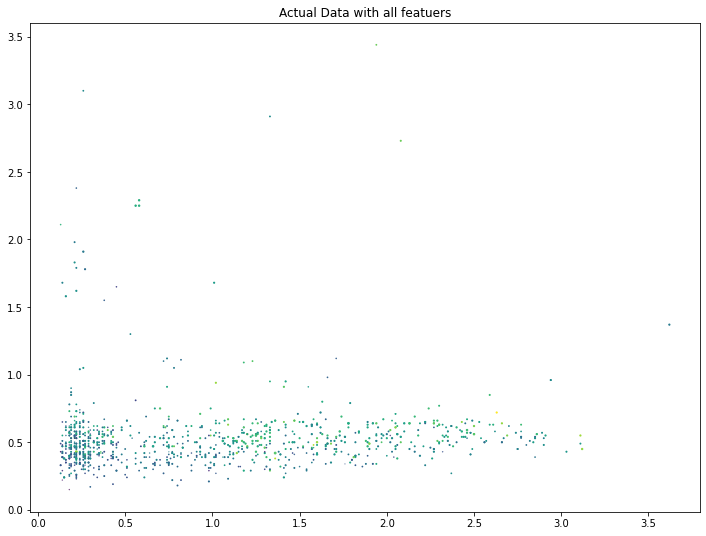

In [113]:
Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)
plt.figure(figsize=(12,9))
plt.scatter(Trip_RecSys_data_.iloc[:, 2], Trip_RecSys_data_.iloc[:, 3], Trip_RecSys_data_.iloc[:, 4], Trip_RecSys_data_.iloc[:, 5])
plt.title("Actual Data with all featuers")


Component/factor based Dimension Reduction PCA/Factor Analysis/Independent Component Analysis (ICA)

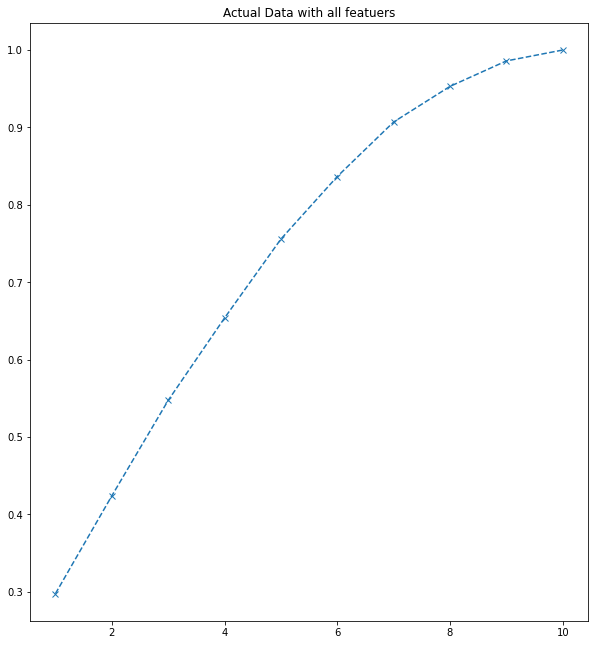

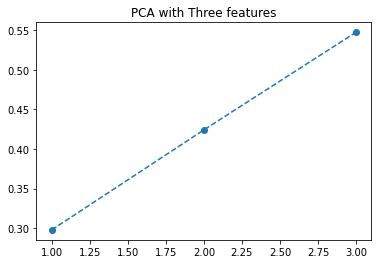

In [18]:

Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)

scaler = StandardScaler()
trip_std_segmenation = scaler.fit_transform(Trip_RecSys_data_)
pca = PCA()
pca.fit(trip_std_segmenation)
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_.cumsum())
plt.figure(figsize=(10,11))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'x', linestyle = '--')
plt.title("Actual Data with all featuers")
plt.show()
pca = PCA(n_components = 3)
pca.fit_transform(trip_std_segmenation)
#print(pca.explained_variance_ratio_.cumsum())
plt.title("PCA with Three features")
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

Projection based Dimension Reduction (UMAP/ISOMAP/t-SNE)

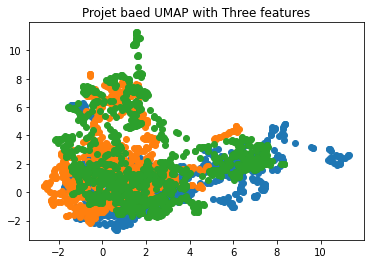

In [17]:
Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)

scaler = StandardScaler()
trip_std_segmenation = scaler.fit_transform(Trip_RecSys_data_)
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(trip_std_segmenation)
plt.title("Projet baed UMAP with Three features")
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])